In [23]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from IPython.core.display import HTML
HTML("<style>.rendered_html th {max-width: 30px;}</style>")

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
drug_trial_complete = pd.merge(clinical_trial_data, mouse_drug_data, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
drug_trial_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,f932,0,45.000000,0,Ketapril
2,g107,0,45.000000,0,Ketapril
3,a457,0,45.000000,0,Ketapril
4,c819,0,45.000000,0,Ketapril
...,...,...,...,...,...
1901,r944,45,41.581521,2,Capomulin
1902,u364,45,31.023923,3,Capomulin
1903,p438,45,61.433892,1,Ceftamin
1904,x773,45,58.634971,4,Placebo


In [48]:
# Get number of drugs
drugs_to_test = drug_trial_complete['Drug'].unique()
num_of_drugs = len(drugs_to_test)
print(num_of_drugs)
drugs_to_test

10


array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Propriva', 'Zoniferol', 'Placebo', 'Ceftamin'],
      dtype=object)

## Tumor Response to Treatment

In [31]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume_data = drug_trial_complete.groupby(["Drug", "Timepoint"], as_index = False).agg(
    {"Tumor Volume (mm3)": 'mean'}
)
# Convert to DataFrame

# Preview DataFrame
mean_tumor_volume_data

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [25]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
std_error_tumor_volumes_data = drug_trial_complete.groupby(["Drug", "Timepoint"], as_index = False).agg(
    {"Tumor Volume (mm3)": 'sem'}
)
# Convert to DataFrame

# Preview DataFrame
std_error_tumor_volumes_data


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [38]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_volume_data.rename(columns = {'Tumor Volume (mm3)':'Average Tumor Volume (mm3)'}, inplace = True)

# Preview that Reformatting worked
mean_tumor_volume_data

,Drug,Timepoint,Average Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [39]:
# Minor Data Munging to Re-Format the Data Frames
std_error_tumor_volumes_data.rename(columns = {'Tumor Volume (mm3)':'Std Error Tumor Volume (mm3)'}, inplace = True)

# Preview that Reformatting worked
std_error_tumor_volumes_data

,Drug,Timepoint,Std Error Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [54]:
# Combine 2 dataframes into one
drug_trial_summary = pd.merge(mean_tumor_volume_data, std_error_tumor_volumes_data, how="left", 
                               left_on=["Drug", "Timepoint"],
                               right_on=["Drug", "Timepoint"])
drug_trial_summary

,Drug,Timepoint,Average Tumor Volume (mm3),Std Error Tumor Volume (mm3)
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.448593
2,Capomulin,10,43.084291,0.702684
3,Capomulin,15,42.064317,0.838617
4,Capomulin,20,40.716325,0.909731
...,...,...,...,...
95,Zoniferol,25,55.432935,0.602513
96,Zoniferol,30,57.713531,0.800043
97,Zoniferol,35,60.089372,0.881426
98,Zoniferol,40,62.916692,0.998515


In [55]:
# Helped by stackoverflow "Plotting errorbar with mean and std after grouping"

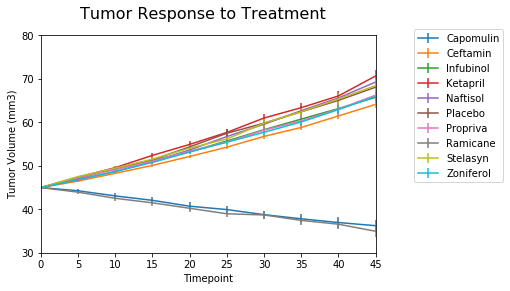

In [62]:
# Generate the Plot (with Error Bars)
# Setting up the plot
x_axis = np.arange(0, 45, 5)
y_axis = np.arange(30, 80, 5)

fig, ax = plt.subplots()
ax.set_xlim(-1, 46)
ax.set_ylim(30, 80)

ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
fig.suptitle('Tumor Response to Treatment', fontsize=16)

for key, group in drug_trial_summary.groupby('Drug'):
    group.plot('Timepoint', 'Average Tumor Volume (mm3)', yerr='Std Error Tumor Volume (mm3)', label=key, ax=ax)   # 2
ax.legend(bbox_to_anchor=(1.1, 1.05))


# Save the Figure



In [63]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [64]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_metastatic_sites_data = drug_trial_complete.groupby(["Drug", "Timepoint"], as_index = False).agg(
    {"Metastatic Sites": 'mean'}
)
# Convert to DataFrame

# Preview DataFrame
mean_metastatic_sites_data

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
...,...,...,...
95,Zoniferol,25,1.687500
96,Zoniferol,30,1.933333
97,Zoniferol,35,2.285714
98,Zoniferol,40,2.785714


In [65]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
std_error_metastatic_sites_data = drug_trial_complete.groupby(["Drug", "Timepoint"], as_index = False).agg(
    {"Metastatic Sites": 'sem'}
)
# Convert to DataFrame

# Preview DataFrame
std_error_metastatic_sites_data

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
...,...,...,...
95,Zoniferol,25,0.236621
96,Zoniferol,30,0.248168
97,Zoniferol,35,0.285714
98,Zoniferol,40,0.299791


In [66]:
# Minor Data Munging to Re-Format the Data Frames
mean_metastatic_sites_data.rename(columns = {'Metastatic Sites':'Average Number of Metastatic Sites'}, inplace = True)

# Preview that Reformatting worked
mean_metastatic_sites_data

,Drug,Timepoint,Average Number of Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
...,...,...,...
95,Zoniferol,25,1.687500
96,Zoniferol,30,1.933333
97,Zoniferol,35,2.285714
98,Zoniferol,40,2.785714


In [67]:
# Minor Data Munging to Re-Format the Data Frames
std_error_metastatic_sites_data.rename(columns = {'Metastatic Sites':'Std of Error for Metastatic Sites'}, inplace = True)

# Preview that Reformatting worked
std_error_metastatic_sites_data

,Drug,Timepoint,Std of Error for Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
...,...,...,...
95,Zoniferol,25,0.236621
96,Zoniferol,30,0.248168
97,Zoniferol,35,0.285714
98,Zoniferol,40,0.299791


In [68]:
# Combine 2 dataframes into one
drug_trial_summary_2 = pd.merge(mean_metastatic_sites_data, std_error_metastatic_sites_data, how="left", 
                               left_on=["Drug", "Timepoint"],
                               right_on=["Drug", "Timepoint"])
drug_trial_summary_2

,Drug,Timepoint,Average Number of Metastatic Sites,Std of Error for Metastatic Sites
0,Capomulin,0,0.000000,0.000000
1,Capomulin,5,0.160000,0.074833
2,Capomulin,10,0.320000,0.125433
3,Capomulin,15,0.375000,0.132048
4,Capomulin,20,0.652174,0.161621
...,...,...,...,...
95,Zoniferol,25,1.687500,0.236621
96,Zoniferol,30,1.933333,0.248168
97,Zoniferol,35,2.285714,0.285714
98,Zoniferol,40,2.785714,0.299791


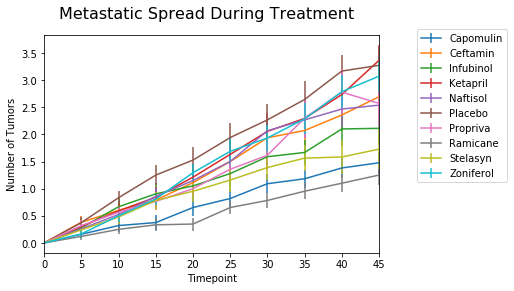

In [69]:
# Generate the Plot (with Error Bars)
x_axis = np.arange(0, 45, 5)
y_axis = np.arange(30, 80, 5)

fig, ax = plt.subplots()
ax.set_xlim(-1, 46)
#ax.set_ylim(30, 80)

ax.set_xlabel("Time (Days)")
ax.set_ylabel("Number of Tumors")
fig.suptitle('Metastatic Spread During Treatment', fontsize=16)

for key, group in drug_trial_summary_2.groupby('Drug'):
    group.plot('Timepoint', 'Average Number of Metastatic Sites', yerr='Std of Error for Metastatic Sites', label=key, ax=ax)   # 2
ax.legend(bbox_to_anchor=(1.1, 1.05))

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)